## Algoritmo de Deutsch-Jozsa

El algoritmo de Deutsch-Jozsa (1992) es históricamente importante porque fue el **primer ejemplo** de un problema donde un computador cuántico logra una **aceleración exponencial determinista** respecto a cualquier algoritmo clásico determinista.

### El problema: función constante o balanceada

Nos dan una función booleana \( f: \{0,1\}^n \to \{0,1\} \) implementada como un oráculo cuántico unitario \( U_f \).  
Se nos garantiza que \( f \) es de uno de los dos tipos:

- **Constante**: \( f(x) = 0 \) o \( f(x) = 1 \) para **todo** \( x \in \{0,1\}^n \).
- **Balanceada**: \( f(x) = 0 \) para exactamente la mitad de los \( 2^n \) valores de \( x \), y \( f(x) = 1 \) para la otra mitad.

**Objetivo**: Determinar con certeza si \( f \) es constante o balanceada.

### Complejidad: clásico vs cuántico

| Tipo de algoritmo       | Número de consultas al oráculo (peor caso) |
|-------------------------|--------------------------------------------|
| Clásico determinista    | \( 2^{n-1} + 1 \)                          |
| Cuántico (Deutsch-Jozsa)| **1**                                      |

¡Aceleración exponencial con certeza absoluta!

### Procedimiento del algoritmo

El circuito utiliza **n qubits de entrada** + **1 qubit ancilla**:

1. Inicializar: \( |0\rangle^{\otimes n} |1\rangle \).
2. Aplicar Hadamard a todos los qubits:
   $$
   |\psi_1\rangle = \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} |x\rangle \, |-\rangle
   $$
   (el ancilla queda en \( |-\rangle = \frac{|0\rangle - |1\rangle}{\sqrt{2}} \)).
3. Aplicar el oráculo \( U_f \):
   $$
   U_f |x\rangle |y\rangle = |x\rangle |y \oplus f(x)\rangle
   $$
   Gracias al estado \( |-\rangle \) del ancilla, ocurre **phase kickback**:
   $$
   |\psi_2\rangle = \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} (-1)^{f(x)} |x\rangle \, |-\rangle
   $$
4. Aplicar Hadamard nuevamente a los **n qubits de entrada**.
5. Medir los **n qubits de entrada** (ignorar el ancilla).

### ¿Por qué funciona? (Derivación clave)

Tras la segunda capa de Hadamard, la amplitud del estado \( |0\rangle^{\otimes n} \) es:

$$
A_{00\dots0} = \frac{1}{2^n} \sum_{x=0}^{2^n-1} (-1)^{f(x)}
$$

- Si \( f \) es **constante** → todos los términos son iguales (+1 o –1) → interferencia constructiva → \( |A_{00\dots0}|^2 = 1 \).  
  → Medimos siempre \( |00\dots0\rangle \).
- Si \( f \) es **balanceada** → mitad +1 y mitad –1 → interferencia destructiva → \( A_{00\dots0} = 0 \).  
  → **Nunca** medimos \( |00\dots0\rangle \).

**Regla de decisión**:
- Resultado \( 00\dots0 \): función **constante**.
- Cualquier otro resultado: función **balanceada**.

### Ejemplo de ejecución (n = 3)

Ejecuta la celda de código siguiente para ver el circuito, la simulación y el histograma. Puedes cambiar `tipo_oraculo` entre `"constant"` y `"balanced"` para probar ambos casos.

*(El código corregido y funcional está en la siguiente celda de código.)*

### Importancia histórica y conceptual

Deutsch-Jozsa ilustra perfectamente dos pilares de la computación cuántica:

- **Paralelismo cuántico**: evaluamos \( f(x) \) en los \( 2^n \) valores simultáneamente con una sola consulta.
- **Interferencia**: la segunda capa de Hadamard provoca interferencia constructiva o destructiva según la propiedad global de \( f \).

Aunque el problema tiene una promesa fuerte (la función siempre es constante o balanceada), su valor pedagógico es inmenso: fue la primera demostración clara de ventaja cuántica exponencial determinista y abrió el camino a algoritmos más prácticos como Grover y Shor.

=== ALGORITMO DE DEUTSCH-JOZSA ===

n = 3 qubits → N = 8 elementos
Tipo de oráculo: balanced

Oráculo balanceado con patrón b = 010 (invertido por convención de Qiskit)

Circuito cuántico completo:


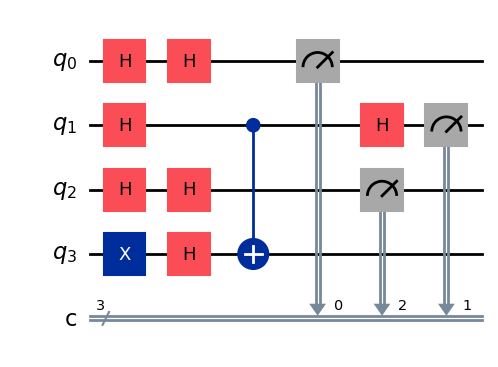


=== RESULTADOS DE LA SIMULACIÓN ===

Resultados (1024 shots):
|010⟩: 1024 veces (100.0%) → ¡FUNCIÓN BALANCEADA!


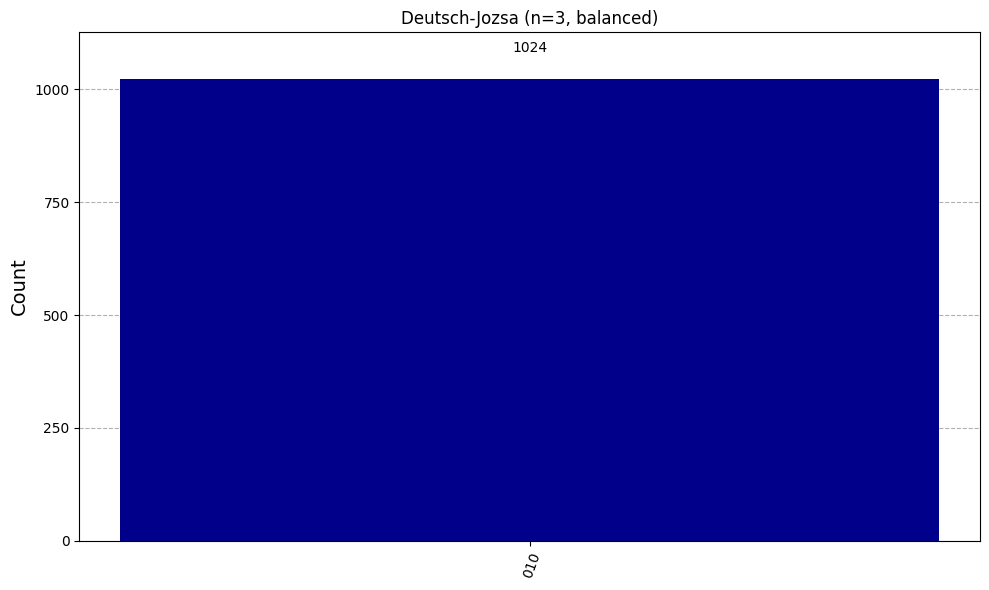

In [2]:
# Importar librerías
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display
import numpy as np

print("=== ALGORITMO DE DEUTSCH-JOZSA ===\n")

# Parámetros
n = 3                    # Número de qubits de entrada
shots = 1024             # Shots para la simulación

# Elegir tipo de oráculo: "constant" o "balanced"
tipo_oraculo = "balanced"   # Cambia a "constant" para probar el otro caso

print(f"n = {n} qubits → N = {2**n} elementos")
print(f"Tipo de oráculo: {tipo_oraculo}\n")

# ===========================
# FUNCIÓN PARA APLICAR EL ORÁCULO DIRECTAMENTE
# ===========================
def apply_oracle(qc, tipo, n):
    """Aplica el oráculo directamente al circuito (sin to_gate())"""
    if tipo == "balanced":
        # Oráculo balanceado: f(x) = suma de ciertos bits modulo 2
        # Elegimos un patrón aleatorio no trivial
        b = np.random.randint(1, 2**n)  # vector secreto
        b_str = format(b, f'0{n}b')[::-1]  # invertimos porque Qiskit usa orden little-endian
        print(f"Oráculo balanceado con patrón b = {b_str} (invertido por convención de Qiskit)")
        for qubit in range(n):
            if b_str[qubit] == '1':
                qc.cx(qubit, n)
    
    elif tipo == "constant":
        output = np.random.randint(2)
        if output == 1:
            print("Oráculo constante: f(x) = 1 para todo x")
            qc.x(n)  # Aplica X al ancilla
        else:
            print("Oráculo constante: f(x) = 0 para todo x")

# ===========================
# CONSTRUCCIÓN DEL CIRCUITO
# ===========================
qc = QuantumCircuit(n+1, n)

# Paso 1: Poner ancilla en |1⟩
qc.x(n)

# Paso 2: Superposición uniforme
qc.h(range(n+1))

# Paso 3: Aplicar el oráculo directamente
apply_oracle(qc, tipo_oraculo, n)

# Paso 4: Segunda capa de Hadamard (solo en qubits de entrada)
qc.h(range(n))

# Paso 5: Medir los n qubits de entrada
qc.measure(range(n), range(n))

# Mostrar circuito
print("\nCircuito cuántico completo:")
display(qc.draw(output='mpl', fold=-1))

# ===========================
# SIMULACIÓN
# ===========================
print("\n=== RESULTADOS DE LA SIMULACIÓN ===")
simulator = AerSimulator()
result = simulator.run(qc, shots=shots).result()
counts = result.get_counts()

# Interpretación
all_zero = '0' * n
prob_all_zero = counts.get(all_zero, 0) / shots

print(f"\nResultados ({shots} shots):")
for state in sorted(counts.keys(), key=lambda x: counts[x], reverse=True):
    count = counts[state]
    prob = count / shots
    if state == all_zero and prob > 0.9:
        conclusion = " → ¡FUNCIÓN CONSTANTE!"
    elif prob_all_zero < 0.1:
        conclusion = " → ¡FUNCIÓN BALANCEADA!"
    else:
        conclusion = ""
    print(f"|{state}⟩: {count:4d} veces ({prob:.1%}){conclusion}")

# Histograma
display(plot_histogram(counts,
                      title=f"Deutsch-Jozsa (n={n}, {tipo_oraculo})",
                      color='darkblue',
                      figsize=(10, 6)))